In [1]:
from datasets import Dataset
from transformers import AutoModel, AutoTokenizer, AutoConfig

import polars as pl


model_name = 'microsoft/deberta-v3-large'
a_tok = '<RESPONSE_A>'
b_tok = '<RESPONSE_B>'
turn_tok = '<TURN>'

df = pl.read_parquet('data/train.parquet')
ds = Dataset.from_pandas(df.to_pandas())

def format_prompt(row):
    chat_list = zip(row['prompt'], row['response_a'], row['response_b'])
    responses = [f"{r[0]}{a_tok}{r[1]}{b_tok}{r[2]}{turn_tok}" for r in chat_list]

    return {'prompt': ''.join(responses)}

tokenizer = AutoTokenizer.from_pretrained(model_name)

ds = ds.map(format_prompt, num_proc=8, batched=False)
tok_ds = ds.map(lambda x: tokenizer(x['prompt']), batched=True)
lengths = [len(t) for t in tok_ds['input_ids']]

/home/mark/miniforge3/envs/kaggle/lib/python3.11/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/home/mark/miniforge3/envs/kaggle/lib/python3.11/site-packages/transformers/convert_slow_tokenizer.py:560: UserWarning: The sentencepiece tokenizer that you are converting to a fast tokenizer uses the byte fallback option which is not implemented in the fast tokenizers. In practice this means that the fast version of the tokenizer can produce unknown tokens whereas the sentencepiece version would have converted these unknown tokens into a sequence of byte tokens matching the original piece of text.
  warnings.warn(


Map (num_proc=8):   0%|          | 0/57477 [00:00<?, ? examples/s]

Map:   0%|          | 0/57477 [00:00<?, ? examples/s]

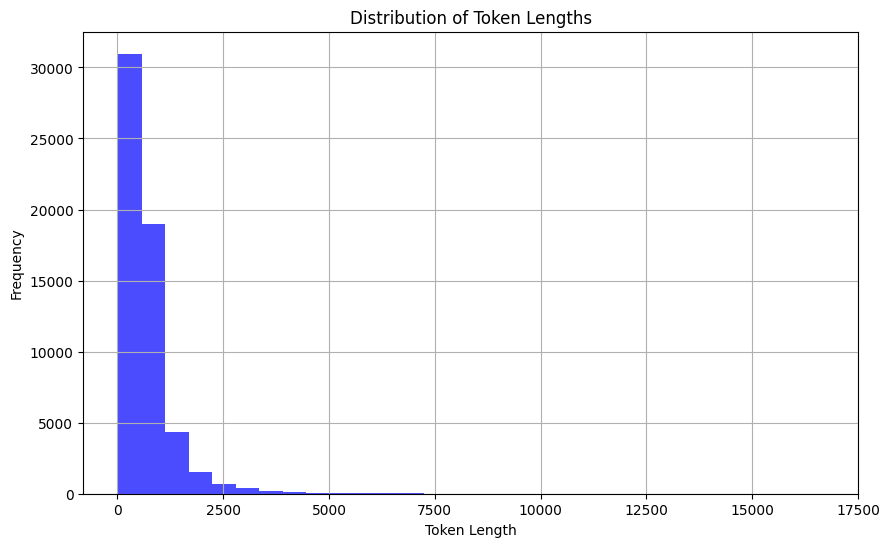

In [2]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(lengths, bins=30, color='blue', alpha=0.7)
plt.title('Distribution of Token Lengths')
plt.xlabel('Token Length')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()